IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME09: algorithme des k-moyennes

L'objectif de ce notebook est d'implémenter l'algorithme des K-moyennes.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

DUPART Guillaume

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-09-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">avant la séance suivante</font>.

**Le compte-rendu est soumis sur la page Moodle.**

In [1]:
# - - - - - - - - - - - - - - - - - -
# imports utiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtpl
%matplotlib inline  

import math
import time
import sys

# Les instructions suivantes sont utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# - - - - - - - - - - - - - - - - - -
# Information sur l'environnent utilisé ici:
print("Version python et des librairies:")
print("\tPython ",sys.version)
print("\tpandas: ",pd.__version__)
print("\tnumpy: ",np.__version__)
print("\tmatplotlib: ",mtpl.__version__)

Version python et des librairies:
	Python  3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
	pandas:  2.2.3
	numpy:  2.2.5
	matplotlib:  3.10.3


/home/yanis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Préparation 

Si vous ne l'avez pas fait lors de la séance précédente, commencer par créer un nouveau fichier de nom `Clustering.py` dans votre répertoire `iads`.
Utilisez les premières lignes du fichier `Classifiers.py` pour débuter votre fichier `Clustering.py`, puis rajoutez dans ce fichier les fonctions écrites dans le TDTME 8:
- normalisation
- dist_euclidienne
- centroide, dist_centroides
- initialise, fusionne, clustering_hierarchique
- toutes les autres fonctions écrites

**Remarque**: il est nécessaire d'ajouter des imports utilisés dans le TDTME 8 dans le fichier `Clustering.py`.

Pensez aussi à ajouter vos fonctions pour contruire les arbres de décision numériques dans votre fichier `Classifiers.py`.

In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust


## Travail à réaliser
Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage `base-Paris.csv`.

Les 2 bases citées ont été fournies dans le TDTME 8, afin de ne pas les recopier, vous pouvez créer un <a href="https://fr.wikipedia.org/wiki/Lien_symbolique">lien symbolique</a> dans votre répertoire `tme-09` pour accéder au répertoire `data` du `tme-08`:

Placez-vous dans votre répertoire `tme-09` dans le terminal puis tapez:

    ln -s ../tme-08/data .
    
Une fois créé, si vous tapez `ls data` dans le répertoire `tme-09` vous aurez l'affichage du contenu du répertoire et les 2 bases seront accessibles directement par `data/base-2D.csv` et `data/base-Paris.csv`.




**Attention**: dans ce notebook, vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.


### Données d'expérimentation

Commencer par charger le fichier <code>base_2D.csv</code> qui permettra d'expérimenter vos fonctions. Dans ce qui suit, on note <code>data_2D</code> le dataframe qui contient les données de ce fichiers.


In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5] 

,X1,X2
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


### Vérification

On vérifie que tout est ok avec la librairie:

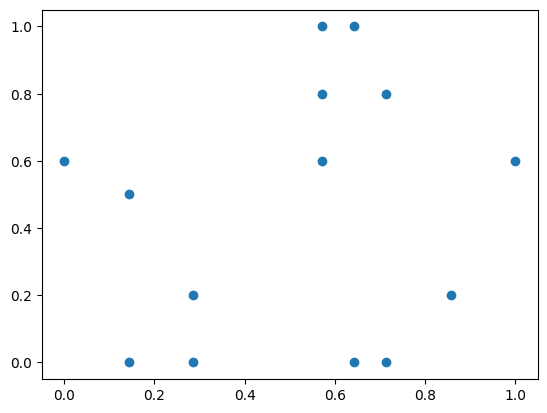

In [4]:
data_2D_norm = clust.normalisation(data_2D)

plt.scatter(data_2D_norm['X1'],data_2D_norm['X2'],)

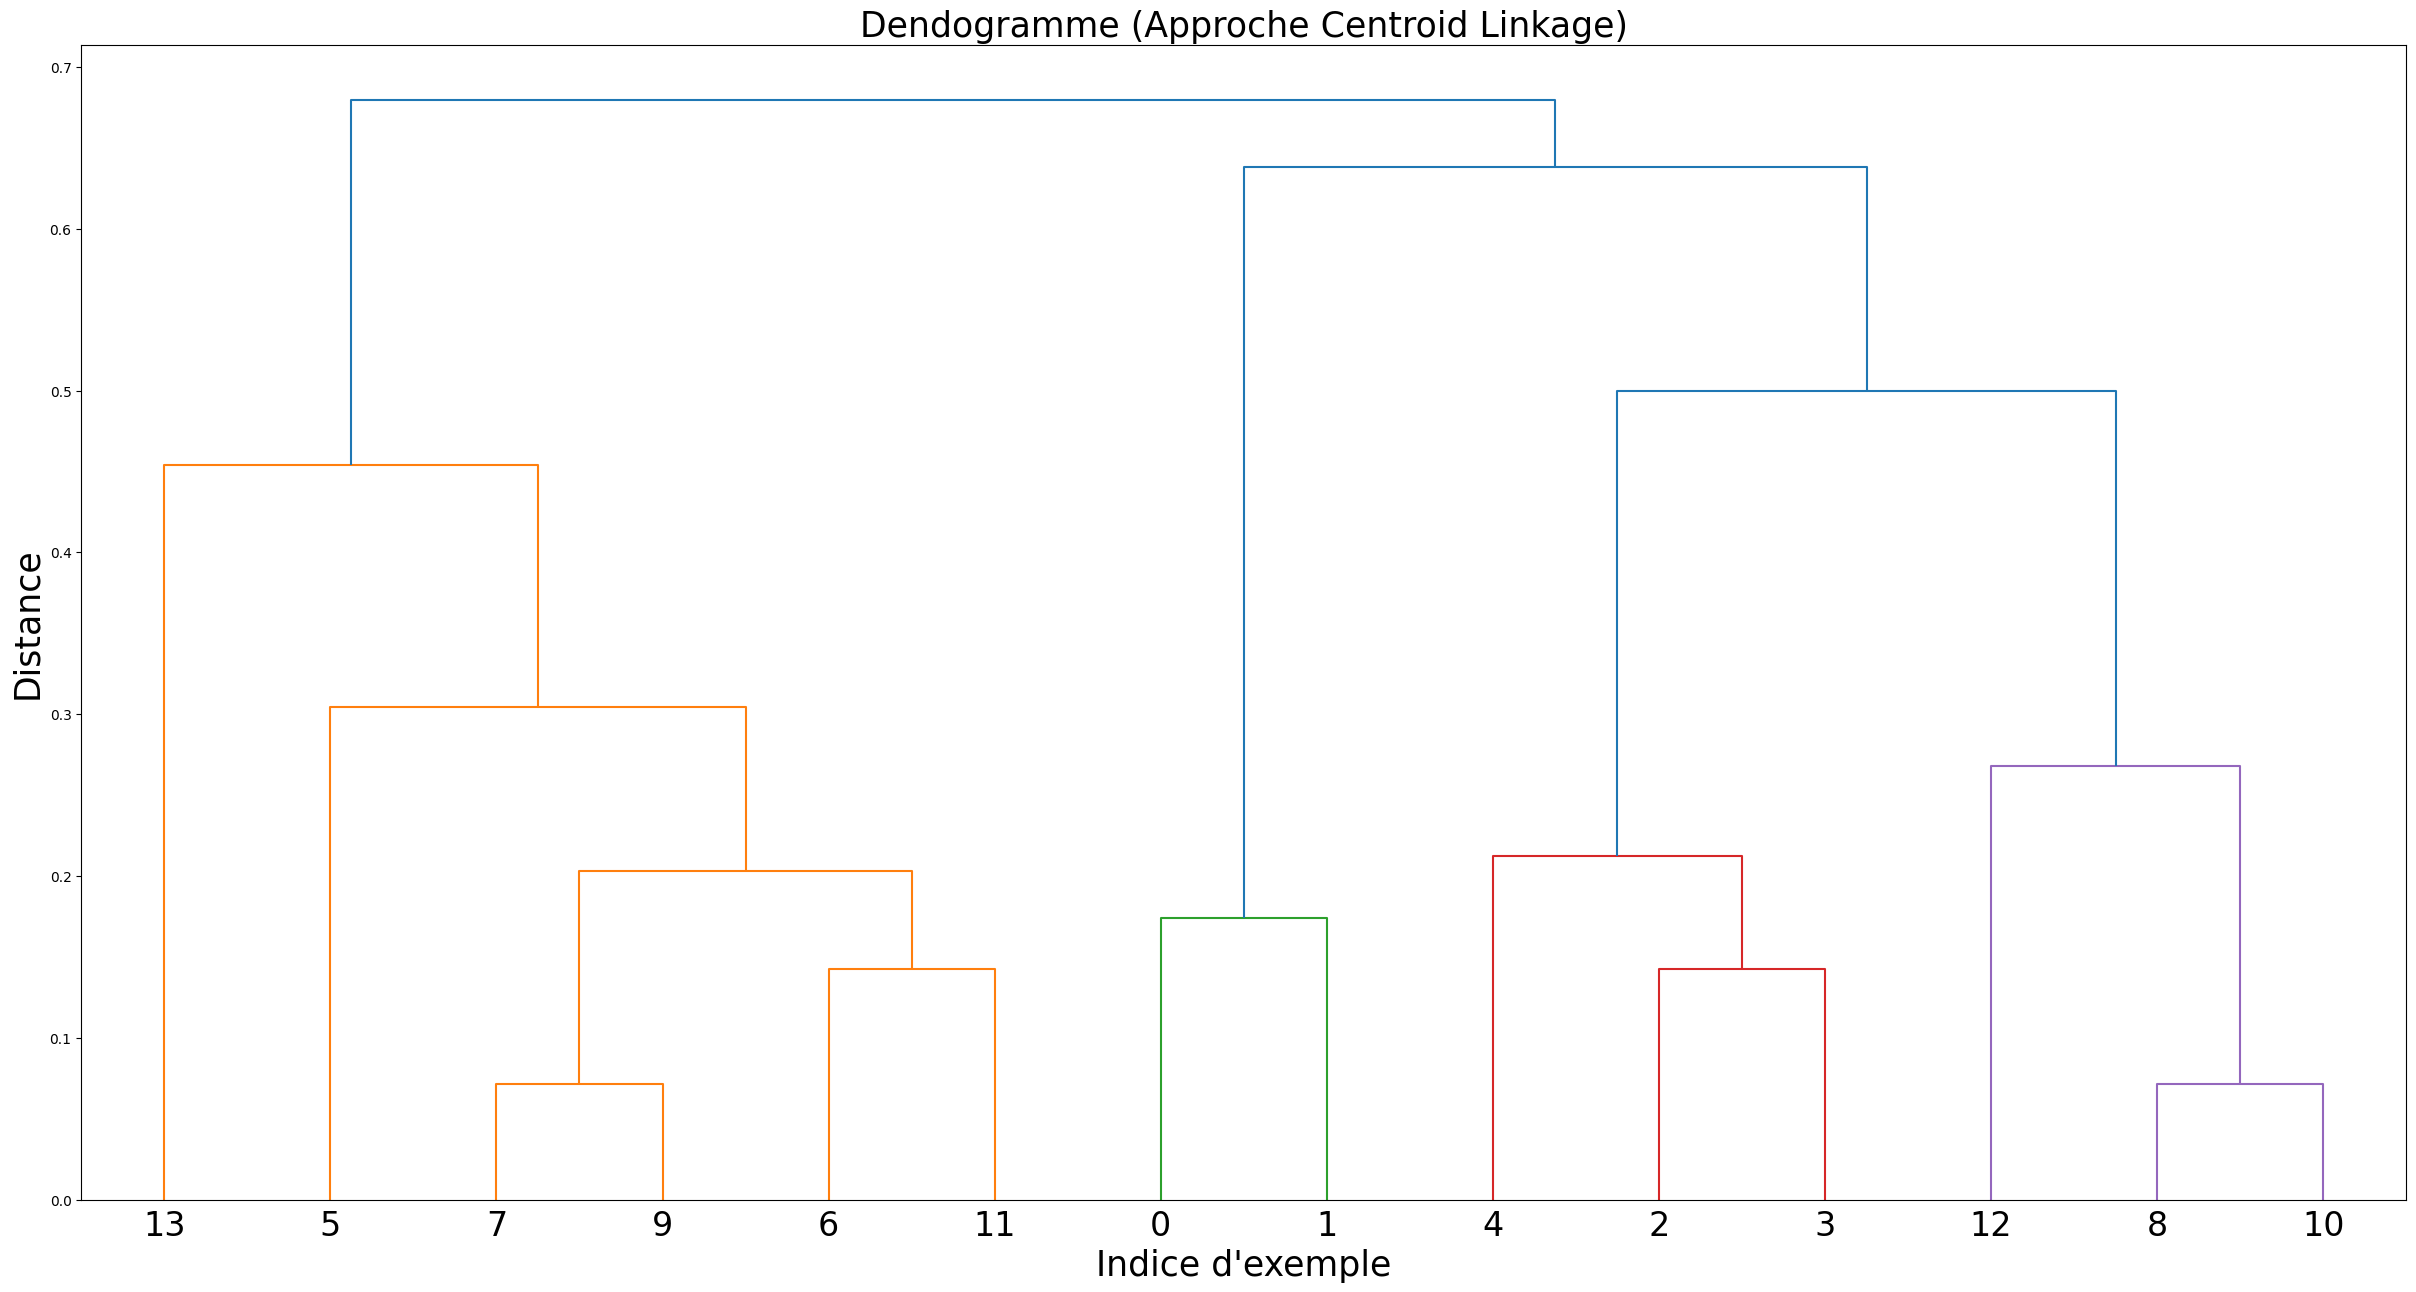

[[8, 10, np.float64(0.0714285714285714), 2],
 [7, 9, np.float64(0.07142857142857151), 2],
 [2, 3, np.float64(0.14285714285714285), 2],
 [6, 11, np.float64(0.1428571428571429), 2],
 [0, 1, np.float64(0.17437936593905287), 2],
 [15, 17, np.float64(0.20316375219039837), 4],
 [4, 16, np.float64(0.21237241067597867), 3],
 [12, 14, np.float64(0.26811891970176366), 3],
 [5, 19, np.float64(0.3047456282855976), 5],
 [13, 22, np.float64(0.4542857142857144), 6],
 [20, 21, np.float64(0.5000000000000001), 6],
 [18, 24, np.float64(0.638139657302555), 8],
 [23, 25, np.float64(0.6796842379114776), 14]]

In [5]:
clust.CHA_centroid(data_2D_norm,verbose=False,dendrogramme=True)

In [6]:
print("Centroide de toutes les données de la base:\n",clust.centroide(data_2D_norm))

Centroide de toutes les données de la base:
 X1    0.510204
X2    0.450000
dtype: float64


## Implémentation des k-moyennes

### Inertie d'un cluster
<font size="+1" color="RED"><b>[Q]</b></font> Ecrire la fonction <code>inertie_cluster</code> qui, étant donné un  ensemble d'exemples (sous la forme d'un dataframe ou d'un np.array) contenant au moins 2 exemples, rend la valeur de l'inertie de cet ensemble telle qu'elle a été définie dans le cours.

In [8]:
def inertie_cluster(Ens):
    """ Array -> float
        Ens: array qui représente un cluster
        Hypothèse: len(Ens)> >= 2
        L'inertie est la somme (au carré) des distances des points au centroide.
    """
    res = 0
    centre = clust.centroide(Ens)

    for elem in Ens.iloc():
        res += clust.dist_euclidienne(elem,centre)**2
    return res
    

In [9]:
print(f"inertie de l'ensemble : {inertie_cluster(data_2D_norm):1.4f}")


inertie de l'ensemble : 2.9760


<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>init_kmeans()</code> qui étant donné un entier $K>1$ et une base d'apprentissage de $n$ exemples rend un np.array composés de $K$ exemples tirés aléatoirement dans la base. On fait l'hypothèse que $K\leq n$.

**Remarque**: étudier les fonctions de la librairie random de Python...


In [10]:
def init_kmeans(K,Ens):
    """ int * Array -> Array
        K : entier >1 et <=n (le nombre d'exemples de Ens)
        Ens: Array contenant n exemples
    """
    return np.array(pd.DataFrame(Ens).sample(n=K))
    

In [11]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Par exemple (mais vous ne devriez pas pouvoir retrouver exactement les mêmes !)
Centroides_test = init_kmeans(3,data_2D_norm)
Centroides_test

array([[0.64285714, 1.        ],
       [0.71428571, 0.8       ],
       [0.        , 0.6       ]])

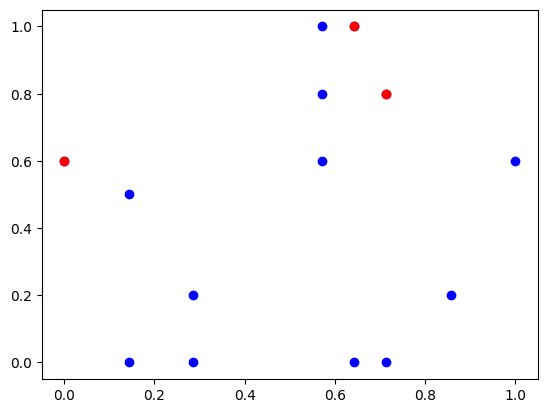

In [12]:
plt.scatter(data_2D_norm['X1'],data_2D_norm['X2'],color='blue')
plt.scatter(Centroides_test[:,0],Centroides_test[:,1],color='red')

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>plus_proche()</code> qui, étant donné un exemple et un array contenant un ensemble de centroides, rend l'indice du centroide dont l'exemple est le plus proche.
En cas d'égalité de distance, le centroide de plus petit indice est choisi.

In [13]:
def plus_proche(Exe,Centres):
    """ Array * Array -> int
        Exe : Array contenant un exemple
        Centres : Array contenant les K centres
    """
    res = 0
    dist_min = math.inf
    for i in range(len(Centres)):
        dist = clust.dist_euclidienne(Exe,Centres[i])
        if dist<dist_min:
            dist_min = dist
            res = i
    return res

In [14]:
# Exemple (vérifier le résultat avec l'affichage graphique réalisé précédemment):
for i in range(0,len(data_2D_norm)):
    pproche = plus_proche(data_2D_norm.iloc[i],Centroides_test)
    print("L'exemple ",i," est le plus proche du centroide ",pproche)

L'exemple  0  est le plus proche du centroide  2
L'exemple  1  est le plus proche du centroide  2
L'exemple  2  est le plus proche du centroide  2
L'exemple  3  est le plus proche du centroide  2
L'exemple  4  est le plus proche du centroide  2
L'exemple  5  est le plus proche du centroide  1
L'exemple  6  est le plus proche du centroide  1
L'exemple  7  est le plus proche du centroide  0
L'exemple  8  est le plus proche du centroide  1
L'exemple  9  est le plus proche du centroide  0
L'exemple  10  est le plus proche du centroide  1
L'exemple  11  est le plus proche du centroide  1
L'exemple  12  est le plus proche du centroide  1
L'exemple  13  est le plus proche du centroide  1


### Matrice d'affectation

Etant donné une base d'apprentissage, on représente une partition de cette base en K clusters à l'aide d'une matrice U contenant n lignes (une par exemple) et K colonnes (une par cluster) et telle que les contraintes suivantes sont vérifiées: 
- U[i,j] = 1 si l'exemple i appartient au cluster j
- U[i,j] = 0 si l'exemple i n'appartient pas au cluster j
- un exemple appartient à un et un seul cluster
- un cluster contient au moins un exemple

On appelle **matrice d'affectation** une telle matrice U.


<font size="+1" color="RED"><b>[Q]</b></font>  Donner une expression mathématique (pas du Python) des 2 dernières contraintes que vérifie une matrice d'affectation.

- Contrainte 1 : pour tout i entre 0 et n-1, pour j allant de 0 à K-1, somme(U[i][j]) = 1
- Contrainte 2 : pour tout j entre 0 et K-1, pour i allant de 0 à n-1, somme(U[i][j]) >= 1

### Implémentation en Python
Nous utilisons un dictionnaire pour représenter d'une matrice d'affectation: 
- les clés de ce dictionnaire correspondent aux $K$ indices des clusters
- les valeurs correspondent à des listes d'indices d'exemples (leur indice dans la base d'apprentissage)

Dans tout ce qui suit, une "matrice d'affectation" sera un tel dictionnaire.


<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>affecte_cluster()</code> qui, étant donné une base d'apprentissage et un ensemble de $K$ centroïdes, rend la matrice d'affectation des exemples de la base aux clusters représentés par chaque centroïde.

In [15]:
def affecte_cluster(Base,Centres):
    """ Array * Array -> dict[int,list[int]]
        Base: Array contenant la base d'apprentissage
        Centres : Array contenant des centroides
    """
    dico = {i: [] for i in range(len(Centres))}
    for i in range(len(Base)):
        proches = plus_proche(Base.iloc[i],Centres)
        dico[proches].append(i)
    return dico  
    

In [16]:
DictAffect = affecte_cluster(data_2D_norm, Centroides_test)
DictAffect

{0: [7, 9], 1: [5, 6, 8, 10, 11, 12, 13], 2: [0, 1, 2, 3, 4]}

### Ensemble des centroides
Grâce à la matrice d'affectation, on peut maintenant trouver les nouveaux centroides. Ceux-ci sont déterminés en prenant les moyennes des ensembles des exemples qui sont affectés au même cluster.

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>nouveaux_centroides()</code> qui, étant donné une base d'apprentissage et une matrice d'affectation, rend l'ensemble des nouveaux centroides obtenus.

In [17]:

def nouveaux_centroides(Base,U):
    """ Array * dict[int,list[int]] -> DataFrame
        Base : Array contenant la base d'apprentissage
        U : Dictionnaire d'affectation
    """
    res = []
    for i in U.keys():
        res.append(clust.centroide(Base.iloc[U[i]]))
    return np.array(res)    
   

In [18]:
data_2D_norm.iloc[DictAffect[0]]

,X1,X2
7,0.571429,1.0
9,0.642857,1.0


In [19]:
clust.centroide(data_2D_norm.iloc[DictAffect[0]])

X1    0.607143
X2    1.000000
dtype: float64

In [20]:
nouveaux_centroides(data_2D_norm, DictAffect)

array([[0.60714286, 1.        ],
       [0.7244898 , 0.42857143],
       [0.17142857, 0.26      ]])

### Inertie globale d'une partition

<font size="+1" color="RED"><b>[Q]</b></font>  En utilisant la fonction `inertie_cluster()`, écrire la fonction `inertie_globale()` qui, étant donné une base d'apprentissage et une matrice d'affectation, rend la valeur de l'inertie globale du partitionnement correspondant.


In [21]:
def inertie_globale(Base, U):
    """ Array * dict[int,list[int]] -> float
        Base : Array pour la base d'apprentissage
        U : Dictionnaire d'affectation
    """
    clusters = []
    for i in U.keys():
        clusters.append(Base.iloc[U[i]])
    return sum([inertie_cluster(cluster) for cluster in clusters])


In [22]:
print(f'Inertie globale: {inertie_globale(data_2D_norm,DictAffect):1.4f}')

Inertie globale: 1.2732


### Algorithme des K-moyennes

<font size="+1" color="RED"><b>[Q]</b></font>  En utilisant les fonctions précédentes, implémenter l'algorithme des K-moyennes.
Pour cela, écrire une fonction <code>kmoyennes()</code> qui prend en argument un entier $K>1$, une base d'apprentissage, ainsi que deux nombres: un réel *epsilon*$>0$ et un entier *iter_max*$>1$, et qui rend un ensemble de centroides et une matrice d'affectation.

Le réel *epsilon* sert de critère de convergence, et l'entier *iter_max* est utilisé pour fixer un nombre d'itérations maximal servant à arrêter le calcul.

In [23]:

def kmoyennes(K, Base, epsilon, iter_max):
    """ int * Array * float * int -> tuple(Array, dict[int,list[int]])
        K : entier > 1 (nombre de clusters)
        Base : Array pour la base d'apprentissage
        epsilon : réel >0
        iter_max : entier >1
    """
    centroides_clusters = init_kmeans(K,Base)
    dictAffect = affecte_cluster(Base,centroides_clusters)
    inertie_iter = inertie_globale(Base,dictAffect)
    diff = epsilon+1
    cpt = 0
    while diff>epsilon and cpt<iter_max:
        cpt += 1
        centroides_clusters = nouveaux_centroides(Base,dictAffect)
        dictAffect = affecte_cluster(Base,centroides_clusters)
        inertie_init = inertie_iter
        inertie_iter = inertie_globale(Base,dictAffect)
        diff = inertie_init-inertie_iter
        print(f"Iteration {cpt} Inertie : {inertie_iter:.4f} Différence : {diff:.4f}")
    return centroides_clusters,dictAffect
    
    

In [24]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(2, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 1.5128 Différence : 0.7354
Iteration 2 Inertie : 1.3921 Différence : 0.1207
Iteration 3 Inertie : 1.3921 Différence : 0.0000
Affichage des centres:  [[0.67857143 0.8       ]
 [0.38392857 0.1875    ]]
Affichage des affectations:  {0: [5, 6, 7, 9, 11, 13], 1: [0, 1, 2, 3, 4, 8, 10, 12]}


In [25]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_norm, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

Iteration 1 Inertie : 0.9095 Différence : 0.3637
Iteration 2 Inertie : 0.8127 Différence : 0.0968
Iteration 3 Inertie : 0.8127 Différence : 0.0000
Affichage des centres:  [[0.61428571 0.84      ]
 [0.80357143 0.2       ]
 [0.17142857 0.26      ]]
Affichage des affectations:  {0: [5, 6, 7, 9, 11], 1: [8, 10, 12, 13], 2: [0, 1, 2, 3, 4]}


On peut réaliser un affichage couleur des centroïdes trouvés:

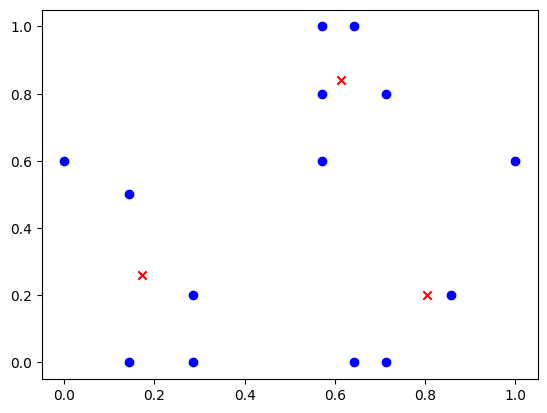

In [26]:
plt.scatter(data_2D_norm['X1'],data_2D_norm['X2'],color='b')
plt.scatter(les_centres[:,0],les_centres[:,1],color='r',marker='x')

<font size="+1" color="RED"><b>[Q]</b></font>  Ecrire la fonction <code>affiche_resultat()</code> qui permet d'afficher le résultat de l'algorithme en utilisant des couleurs différentes pour les clusters trouvés (pour faire simple, on peut ne considèrer que le cas où K est inférieur à 20).

*Remarque*: La librairie matplotlib permet de manipuler aisément des couleurs:
http://matplotlib.org/api/cm_api.html

Par exemple, on peut utiliser la table des couleurs (colormap) de nom `tab20` qui contient 20 couleurs différentes.

nombre de couleurs différentes 20


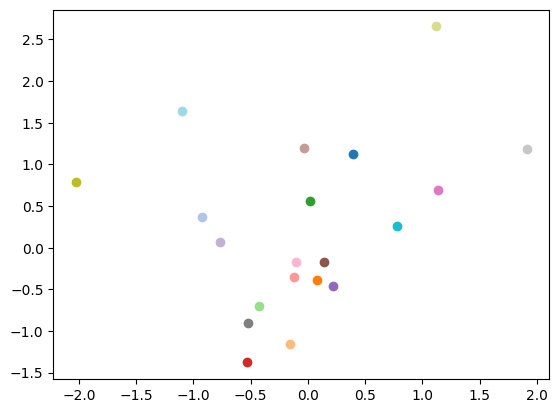

In [27]:
# Librairie pour manipuler les colormaps:
import matplotlib.cm as cm

# on transforme le colormap en couleurs utilisable par plt.scatter:
couleurs = cm.tab20(np.linspace(0, 1, 20))

print("nombre de couleurs différentes",len(couleurs))

# Pour voir ces couleurs, on va afficher 20 points aléatoirement définis:
x = np.random.randn(len(couleurs))
y = np.random.randn(len(couleurs))       

for (x,y,c) in zip(x,y,couleurs):
    plt.scatter(x, y, color=c)
    

In [28]:
import matplotlib.cm as cm

def affiche_resultat(Base,Centres,Affect):
    """ DataFrame **2 * dict[int,list[int]] -> None
    """
    couleurs = cm.tab20(np.linspace(0, 1, Centres.shape[0]))
    print(Base.iloc[0])
    for k in Affect:
        indices = Affect[k]
        cluster_points = Base.iloc[indices]
        plt.scatter(cluster_points['X1'], cluster_points['X2'], color=[couleurs[k]])

    plt.scatter(Centres[:,0],Centres[:,1],color='r',marker='x')
    plt.show()

X1    0.0
X2    0.6
Name: 0, dtype: float64


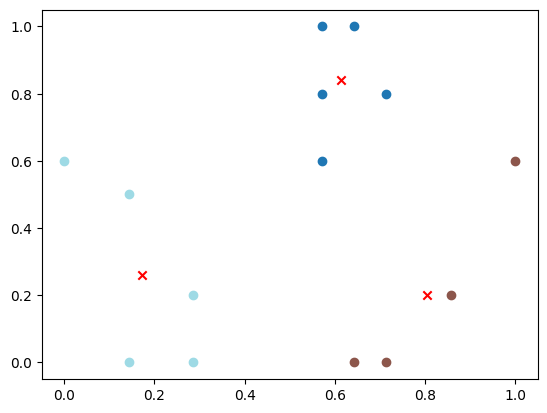

In [29]:
affiche_resultat(data_2D_norm,les_centres,l_affectation)

# Remarque:
#  - les centres sont représentés par des croix rouges

## Données différentes

Il y a 23 exemples dans la base.


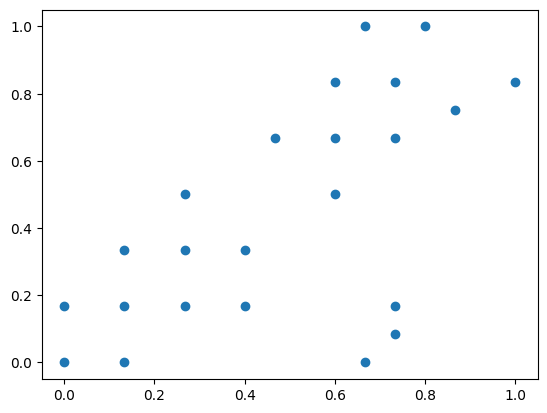

In [30]:
data_2D_diff = clust.normalisation(pd.read_csv("data/base-2D-diff.csv"))
# ------------------------ 

print("Il y a", len(data_2D_diff), "exemples dans la base.")

data_2D_diff

plt.scatter(data_2D_diff['X1'],data_2D_diff['X2'],)


Iteration 1 Inertie : 0.9876 Différence : 0.1504
Iteration 2 Inertie : 0.9679 Différence : 0.0197
Affichage des centres:  [[0.71851852 0.80555556]
 [0.50833333 0.26041667]
 [0.11111111 0.13888889]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [7, 8, 9, 11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6]}
X1    0.0
X2    0.0
Name: 0, dtype: float64


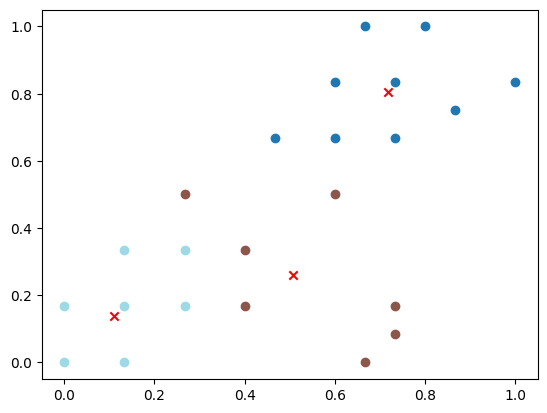

In [31]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_2D_diff,les_centres,l_affectation)


Iteration 1 Inertie : 0.9093 Différence : 0.0000
Affichage des centres:  [[0.71851852 0.80555556]
 [0.68333333 0.1875    ]
 [0.2        0.21666667]]
Affichage des affectations:  {0: [10, 12, 13, 15, 18, 19, 20, 21, 22], 1: [11, 14, 16, 17], 2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}
X1    0.0
X2    0.0
Name: 0, dtype: float64


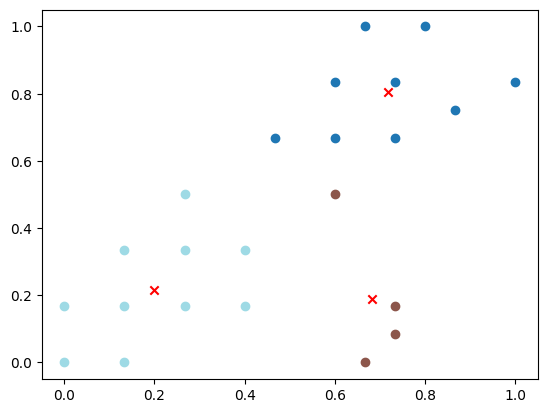

In [32]:
np.random.seed(1)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = kmoyennes(3, data_2D_diff, 0.05, 100)

print("Affichage des centres: ",les_centres)
print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_2D_diff,les_centres,l_affectation)


## Beaucoup de points...

On essaye en générant aléatoire 1000 points, toujours en 2 dimensions.
Pour cela, on reprend la fonction `nb.random.multivariate_normal` que l'on a déjà utilisé dans le TME 2. On va générer la moitié des points selon une gaussienne centrée sur $(2,1)$ et l'autre moitié des points selon une gaussienne centrée sur $(-2-2)$. De cette façon, on créé artificiellement 2 paquets de points et on va regarder si l'algorithme des k-moyennes peut arriver à les retrouver.

Taille du dataset généré : 1000 exemples


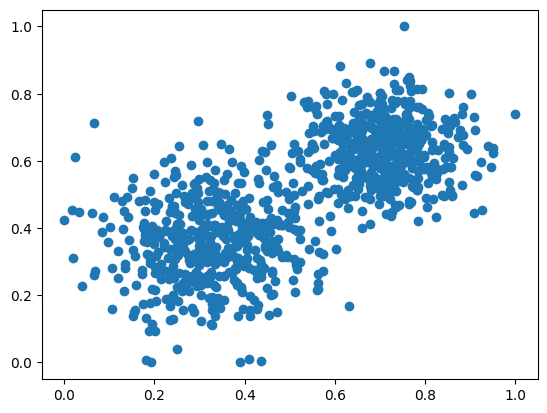

In [36]:
np.random.seed(42)   # on prend 42 comme graine


nb_points = 500

# génération des groupes de points 
cluster1_centre = np.array([2,1])
cluster1_sigma = np.array([[1,0],[0,1]])
cluster2_centre = np.array([-2,-2])
cluster2_sigma = np.array([[1.5,0],[0,1.5]])
cluster1_points = np.random.multivariate_normal(cluster1_centre,cluster1_sigma,nb_points)
cluster2_points = np.random.multivariate_normal(cluster2_centre,cluster2_sigma,nb_points)

# on stocke les points dans un dataframe (en les normalisant)
desc = np.concatenate((cluster1_points, cluster2_points))
data_rand = clust.normalisation(pd.DataFrame(desc,columns=['X1','X2']))
    
print("Taille du dataset généré :", data_rand.shape[0], "exemples")

# Affichage des points obtenus:
plt.scatter(data_rand['X1'],data_rand['X2'])



Iteration 1 Inertie : 24.8864 Différence : 23.7976
Iteration 2 Inertie : 22.2963 Différence : 2.5901
Iteration 3 Inertie : 22.2080 Différence : 0.0883
Iteration 4 Inertie : 22.2070 Différence : 0.0010
Pour k= 2 
Affichage des centres:  [[0.70030532 0.63310693]
 [0.32219792 0.34976565]]
X1    0.751467
X2    0.618231
Name: 0, dtype: float64


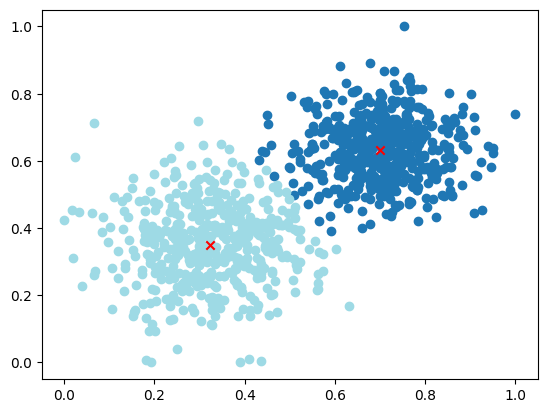

In [37]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

val_k = 2
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


Iteration 1 Inertie : 15.1172 Différence : 9.3369
Iteration 2 Inertie : 14.9648 Différence : 0.1524
Iteration 3 Inertie : 14.9540 Différence : 0.0108
Pour k= 4 
Affichage des centres:  [[0.70819669 0.63670188]
 [0.19521444 0.37895914]
 [0.34805922 0.24277949]
 [0.39602839 0.45782145]]
X1    0.751467
X2    0.618231
Name: 0, dtype: float64


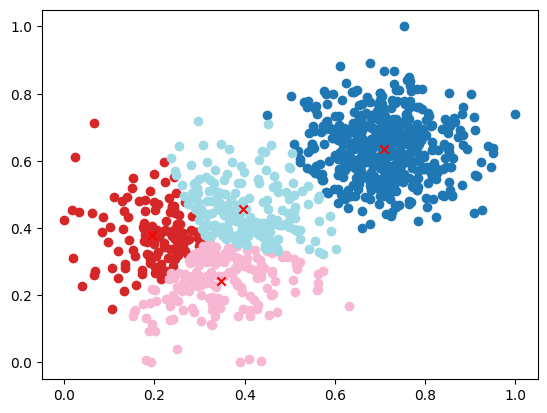

In [38]:
# On peut essayer avec plus de clusters que prévu :

np.random.seed(42)   

val_k = 4
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


Iteration 1 Inertie : 15.8956 Différence : 1.6593
Iteration 2 Inertie : 15.2664 Différence : 0.6291
Iteration 3 Inertie : 15.0246 Différence : 0.2419
Iteration 4 Inertie : 14.8177 Différence : 0.2069
Iteration 5 Inertie : 14.7204 Différence : 0.0972
Iteration 6 Inertie : 14.6824 Différence : 0.0380
Pour k= 4 
Affichage des centres:  [[0.32764404 0.45910879]
 [0.32185729 0.26648635]
 [0.74272566 0.57193156]
 [0.66051152 0.70375276]]
X1    0.751467
X2    0.618231
Name: 0, dtype: float64


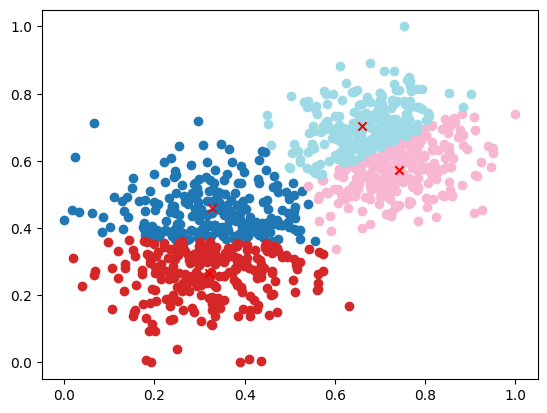

In [39]:
# Autre exécution avec le même k que précédemment

np.random.seed(2023)  

val_k = 4
les_centres, l_affectation = kmoyennes(val_k, data_rand, 0.05, 100)

print("Pour k=",val_k,"\nAffichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

affiche_resultat(data_rand,les_centres,l_affectation)


## Expérimentations

<font size="+1" color="RED"><b>[Q]</b></font>  Expérimenter l'algorithme des k-moyennes sur les données. Etudier l'impact du choix de $K$ sur l'inertie globale finale. Faire de même en relançant plusieurs fois l'algorithme avec la même valeur de $K$, en modifiant la valeur de epsilon ou de max_iter, etc.


<font size="+1" color="RED"><b>[Q]</b></font>  Expérimenter l'algorithme des k-moyennes sur les données de la base `base_Paris` vue dans le TDTME précédent.

Vous pouvez afficher les résultats obtenus avec le clustering hiérarchique afin de trouver une bonne valeur pour $K$.
